In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,\
                            classification_report, cohen_kappa_score

In [2]:
df = pd.DataFrame(loadarff('dados/phpokU53r.arff')[0])

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,b'1'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'1'
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,b'1'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'1'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'1'


In [4]:
df.Class = df.Class.astype(str)

In [5]:
df.head()

,V1,V2,V3,V4,V5,V6,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [6]:
diag = {'1':'Disk Hernia', '2':'Spondylolisthesis', '3':'Normal'}

df['Diag'] = [diag[Class] for Class in df.Class]

df.drop('Class', axis=1, inplace=True)

In [7]:
df.head()

,V1,V2,V3,V4,V5,V6,Diag
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Disk Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Disk Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,Disk Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Disk Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Disk Hernia


In [8]:
df.groupby('Diag').mean()

,V1,V2,V3,V4,V5,V6
Diag,,,,,,
Disk Hernia,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Normal,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687
Spondylolisthesis,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572


In [9]:
df.groupby('Diag').describe().T

Diag      Disk Hernia      Normal  Spondylolisthesis
V1 count    60.000000  150.000000         100.000000
   mean     47.638407   71.514224          51.685244
   std      10.697131   15.109337          12.368161
   min      26.147921   37.903910          30.741938
   25%      41.018099   60.658136          42.817849
   50%      46.416169   72.149306          50.123115
   75%      53.922329   81.075893          61.470097
   max      74.433593  129.834041          89.834676
V2 count    60.000000  150.000000         100.000000
   mean     17.398795   20.748038          12.821414
   std       7.016708   11.506169           6.778503
   min       3.144669   -6.554948          -5.845994
   25%      12.874329   13.461149           8.799951
   50%      16.949285   19.309548          13.482435
   75%      22.002981   29.229680          16.785953
   max      41.557331   49.431864          29.894119
V3 count    60.000000  150.000000         100.000000
   mean     35.463524   64.110108          43.542605
   std       9.767795   16.397068          12.361388
   min      14.000000   24.710274          19.071075
   25%      29.038069   52.000000          35.000000
   50%      35.164873   62.555200          42.638923
   75%      42.011563   76.990924          51.602345
   max      62.275275  125.742386          90.563461
V4 count    60.000000  150.000000         100.000000
   mean     30.239612   50.766186          38.863830
   std       7.555388   12.318813           9.624004
   min      13.366931   19.290046          17.386972
   25%      25.215274   43.166815          32.340486
   50%      30.000659   50.751695          37.059694
   75%      34.962103   56.675435          44.608788
   max      46.613539  121.429566          67.195460
V5 count    60.000000  150.000000         100.000000
   mean    116.474968  114.518810         123.890834
   std       9.355720   15.579995           9.014246
   min      84.241415   70.082575         100.501192
   25%     112.280320  104.706761         118.182659
   50%     116.696146  114.842400         123.874329
   75%     122.042999  123.337307         129.040402
   max     137.540613  163.071041         147.894637
V6 count    60.000000  150.000000         100.000000
   mean      2.480251   51.896687           2.186572
   std       5.531177   40.108030           6.307483
   min     -10.675871    1.010041         -11.058179
   25%      -0.910818   30.393271          -1.511360
   50%       2.542441   42.372509           1.152710
   75%       6.059666   61.894425           4.968807
   max      15.779697  418.543082          31.172767

In [10]:
df.drop(df[df.V6 > 400].index, inplace=True)

In [11]:
X = df.drop('Diag', axis=1)
y = df.Diag

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=0)

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [13]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

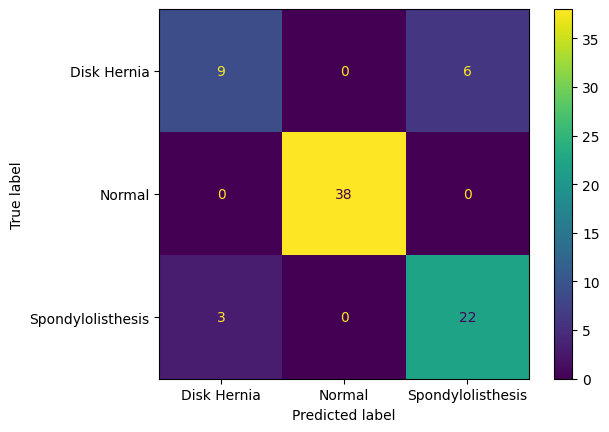

In [14]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                       display_labels=df.Diag.unique().tolist()).plot()
plt.show()